**ИУ5-23М Морозевич Мария**

**Вариант: 8**


Номер задачи №1: 8

Номер задачи №2: 28

Дополнительные требования: для произвольной колонки данных построить график "Ящик с усами (boxplot)".

# Задача №8

Для набора данных проведите устранение пропусков для одного (произвольного) числового признака с использованием метода заполнения модой.

**Описание набора данных**

Набор данных представляет собой данные с отзыввами и рейтингами авиакомпаний пассажирами о различных аспектах их впечатлений от полетов в различных авиакомпаниях.

Названия и описания колонок набора данных:

*   Aircraft Type: Тип воздушного судна, используемого для полета
*   Users Reviews: Тексты отзывов, предоставленных пользователями
*   Country: Страна авиакомпании или отправления/пункта назначения рейса
*   Type of Travellers: Классификация путешественников (например, одиноких, семейных, деловых...)
*   Route: Выбранный маршрут полета
*   Seat Types: Класс места (Эконом, Бизнес, Первый класс...)
*   Seat Comfort: Оценка комфортности места
*   Date Flown: Дата полета
*   Cabin Staff Service: Оценка сервиса, предоставляемого персоналом салона
*   Ground Service/Floor: Оценка наземного обслуживания, включая регистрацию на рейс и посадку
*   Food & Beverages: Оценка качества питания и напитков
*   Wifi & Connectivity: Рейтинг доступных возможностей Wi-Fi и подключений
*   Inflight Entertainment: Рейтинг вариантов развлечений в полете
*   Value For Money: Общий рейтинг соотношения цены и качества
*   Recommended: Итоговая рекомендация авиакомпании пользователем

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.io import arff
from sklearn.impute import SimpleImputer
%matplotlib inline
sns.set(style="ticks")

In [12]:
data_loaded = pd.read_csv('Airlines Reviews and Rating.csv', sep=",")

In [13]:
data = data_loaded

In [14]:
list(zip(data.columns, [i for i in data.dtypes]))

[('Aircraft Type', dtype('O')),
 ('Users Reviews', dtype('O')),
 ('Country', dtype('O')),
 ('Type_of_Travellers', dtype('O')),
 ('Route', dtype('O')),
 ('Seat_Types', dtype('O')),
 ('Seat Comfort', dtype('float64')),
 ('Date Flown', dtype('O')),
 ('Cabin Staff Service', dtype('float64')),
 ('Ground Service', dtype('float64')),
 ('Food & Beverages', dtype('float64')),
 ('Wifi & Connectivity', dtype('float64')),
 ('Inflight Entertainment', dtype('float64')),
 ('Value For Money', dtype('int64')),
 ('Recommended', dtype('O'))]

In [15]:
# Колонки с пропусками
cols_with_na = [c for c in data.columns if data[c].isnull().sum() > 0]
cols_with_na

['Aircraft Type',
 'Country',
 'Type_of_Travellers',
 'Route',
 'Seat_Types',
 'Seat Comfort',
 'Date Flown',
 'Cabin Staff Service',
 'Ground Service',
 'Food & Beverages',
 'Wifi & Connectivity',
 'Inflight Entertainment']

In [16]:
data_loaded.shape

(3290, 15)

In [17]:
# Количество пропусков
[(c, data[c].isnull().sum()) for c in cols_with_na]

[('Aircraft Type', 1394),
 ('Country', 1),
 ('Type_of_Travellers', 403),
 ('Route', 407),
 ('Seat_Types', 3),
 ('Seat Comfort', 114),
 ('Date Flown', 410),
 ('Cabin Staff Service', 125),
 ('Ground Service', 478),
 ('Food & Beverages', 379),
 ('Wifi & Connectivity', 2698),
 ('Inflight Entertainment', 1119)]

In [18]:
# Доля пропусков
[(c, (data[c].isnull().mean()) * 100) for c in cols_with_na]

[('Aircraft Type', 42.37082066869301),
 ('Country', 0.030395136778115502),
 ('Type_of_Travellers', 12.249240121580547),
 ('Route', 12.37082066869301),
 ('Seat_Types', 0.0911854103343465),
 ('Seat Comfort', 3.4650455927051675),
 ('Date Flown', 12.462006079027356),
 ('Cabin Staff Service', 3.7993920972644375),
 ('Ground Service', 14.52887537993921),
 ('Food & Beverages', 11.519756838905774),
 ('Wifi & Connectivity', 82.00607902735563),
 ('Inflight Entertainment', 34.01215805471124)]

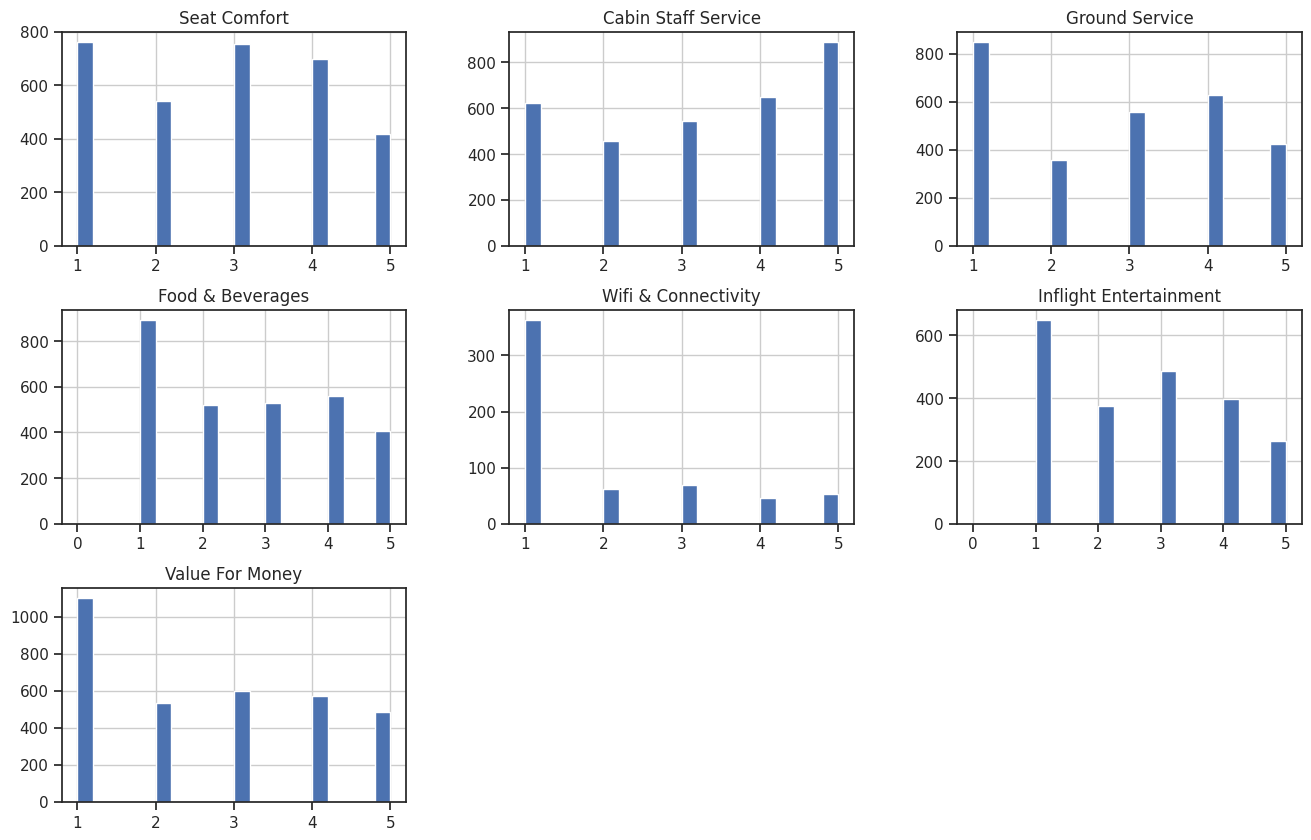

In [19]:
data.hist(bins=20, figsize=(16,10))
plt.show()

<Axes: ylabel='Density'>

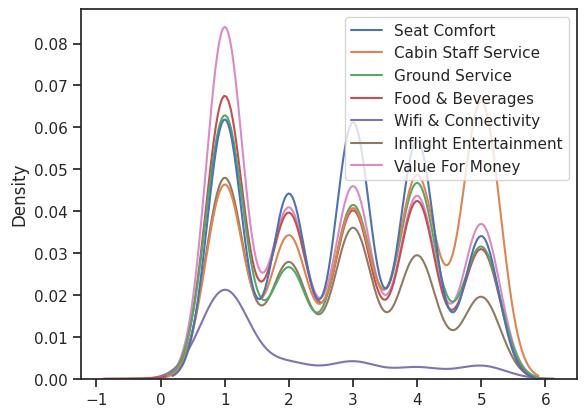

In [20]:
sns.kdeplot(data)

Единственным близким к одномодальному распределению - у колонки "Wifi & Connectivity". Заменим в ней пропуски модой

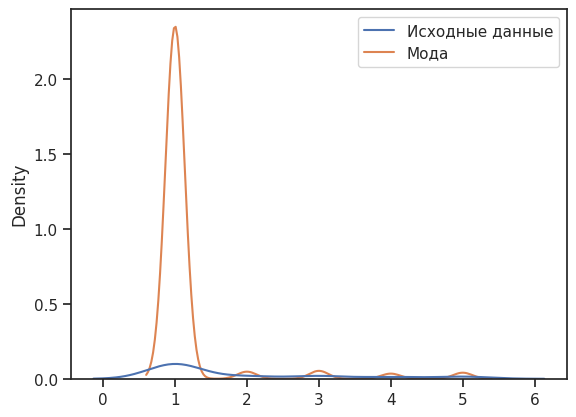

In [21]:
# Построение графика разницы между исходными данными признака и данными признака с модой вместо пропусков.
temp_data = data[['Wifi & Connectivity']].values
size = temp_data.shape[0]
new_df = pd.DataFrame({'Исходные данные':temp_data.reshape((size,))})
imputer = SimpleImputer(strategy='most_frequent')
temp_data_filled = imputer.fit_transform(temp_data)
new_df['Мода'] = temp_data_filled.reshape((size,))
sns.kdeplot(data=new_df)

# Замена данных указанного признака на данные с модой вместо пропусков.
data['Wifi & Connectivity'] = data['Wifi & Connectivity'].replace(new_df['Мода'])

В итоге из-за большой доли пропусков распределение сильно поменялось после замены.

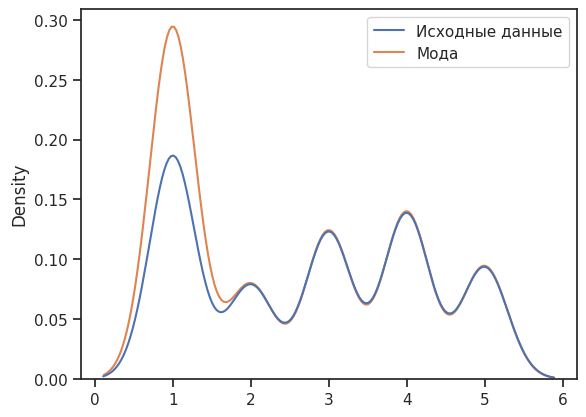

In [30]:
# Построение графика разницы между исходными данными признака и данными признака с модой вместо пропусков.
temp_data = data[['Ground Service']].values
size = temp_data.shape[0]
new_df = pd.DataFrame({'Исходные данные':temp_data.reshape((size,))})
imputer = SimpleImputer(strategy='most_frequent')
temp_data_filled = imputer.fit_transform(temp_data)
new_df['Мода'] = temp_data_filled.reshape((size,))
sns.kdeplot(data=new_df)

# Замена данных указанного признака на данные с модой вместо пропусков.
data['Ground Service'] = data['Ground Service'].replace(new_df['Мода'])

# Задача №28

Для набора данных для одного (произвольного) числового признака проведите обнаружение и замену (найденными верхними и нижними границами) выбросов на основе межквартильного размаха

**Описание набора данных**

HTRU2 - это набор данных, описывающий выборку потенциальных пульсаров,собранных в ходе исследования Вселенной с высоким временным разрешением (South).

Представленный набор данных содержит 16 259 ложных примеров, вызванных радиочастотными помехами, и 1 639 реальных примеров пульсаров. Все эти примеры были проверены комментаторами-людьми.

In [22]:
data_2 = arff.loadarff('HTRU_2.arff')
data_loaded = pd.DataFrame(data_2[0])

In [23]:
data_2 = data_loaded

In [24]:
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])
    fig.suptitle(title)
    plt.show()

<ipython-input-24-766c933c159f>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


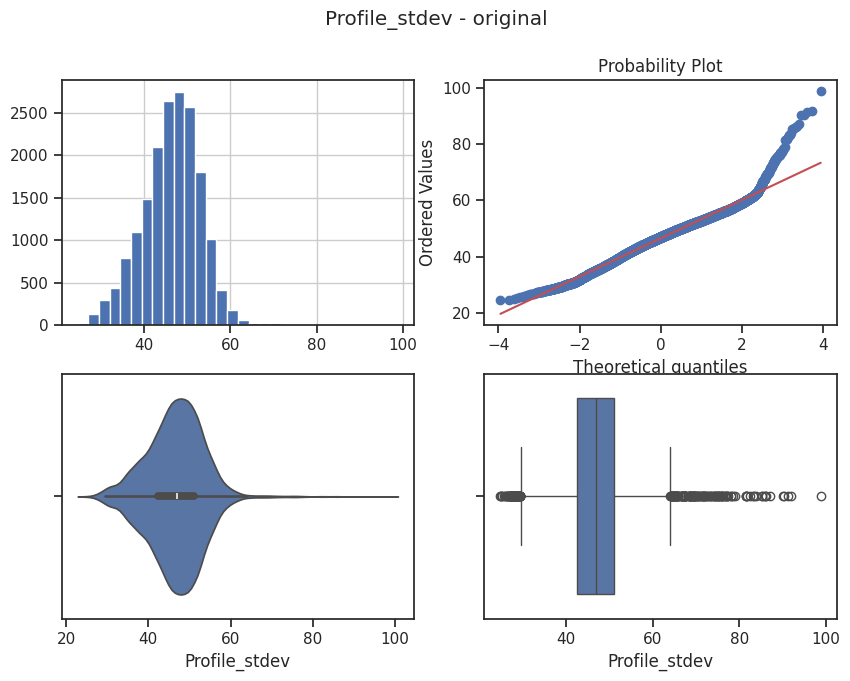

In [25]:
# Заменить название колонки на мое
diagnostic_plots(data_2, 'Profile_stdev', 'Profile_stdev - original')

In [26]:
# Функция вычисления верхней и нижней границы выбросов
def get_outlier_boundaries(df, col):
    K = 1.5
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    lower_boundary = df[col].quantile(0.25) - (K * IQR)
    upper_boundary = df[col].quantile(0.75) + (K * IQR)
    return lower_boundary, upper_boundary

<ipython-input-24-766c933c159f>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


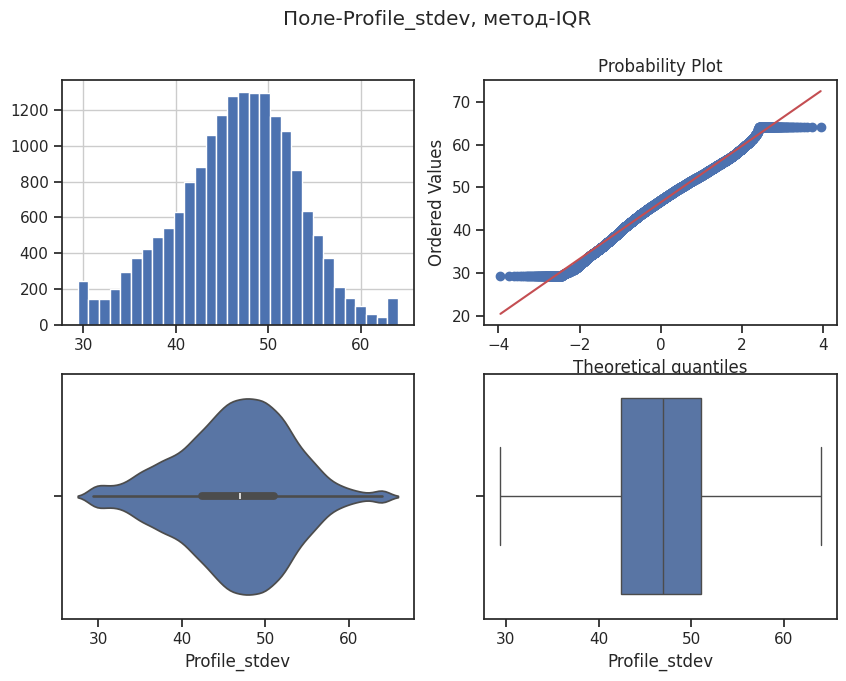

In [27]:
# Вычисление верхней и нижней границы
lower_boundary, upper_boundary = get_outlier_boundaries(data_2,'Profile_stdev')
# Изменение данных
data_2['Profile_stdev'] = np.where(data_2['Profile_stdev'] > upper_boundary, upper_boundary,
                 np.where(data_2['Profile_stdev'] < lower_boundary, lower_boundary, data_2['Profile_stdev']))
title = 'Поле-{}, метод-{}'.format('Profile_stdev', 'IQR')
diagnostic_plots(data_2, 'Profile_stdev', title)

# Дополнительное задание

Для произвольной колонки данных построить график "Ящик с усами (boxplot)".

<Axes: xlabel='Profile_mean'>

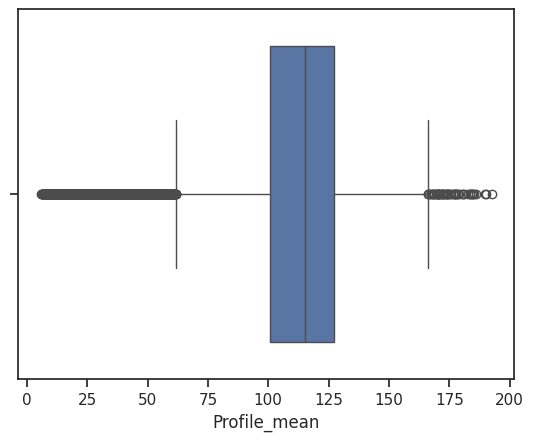

In [28]:
# Построим график "Ящик с усами" для колонки "Profile_mean"
sns.boxplot(x=data_2['Profile_mean'])